# Importamos las librerias necesarias 

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score, auc, classification_report

# Data Frame a utilizar 

In [66]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección 
# y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
# tras observar los datos del día de hoy, el objetivo es predecir las variables target:
# -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
# -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Análisis descriptivo de los datos

In [67]:
### Vista de datos
df.head()
df.tail()
print("Tamaño: "+str(df.shape))

# Borramos columna de índices porque no la necesitamos, y además, tiene faltantes.
df.drop(df.columns[0], axis=1, inplace=True)
df.tail()

Tamaño: (145412, 25)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145407  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145408  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145409  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145410  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145411  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
145407       NaN           E           31.0        ESE  ...        27.0   
145408       NaN           E           31.0         SE  ...        24.0   
145409       NaN         NNW           22.0         SE  ...        21.0   
145410       NaN           N           37.0         SE  ...        24.0   
145411       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
145407       1024.7       1021.2       NaN       NaN      9.4     20.9   
145408       1024.6       1020.3       NaN       NaN     10.1     22.4   
145409       1023.5       1019.1       NaN       NaN     10.9     24.5   
145410       1021.0       1016.8       NaN       NaN     12.5     26.1   
145411       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  RainfallTomorrow  
145407         No            No               0.0  
145408         No            No               0.0  
145409         No            No               0.0  
145410         No            No               0.0  
145411         No            No               0.0  

[5 rows x 24 columns]

In [68]:
# Columnas del dataframe
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [69]:
# Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
tipos_de_datos = df.dtypes

variables_categoricas = tipos_de_datos[df.dtypes == 'object'].index
variables_numericas = tipos_de_datos[df.dtypes != 'object'].index

print("Variables Categóricas:")
print(variables_categoricas)
print("\nVariables Numéricas:")
print(variables_numericas)

Variables Categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Variables Numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')


**Significado de las variables categóricas**

Date [String]: fecha de la muestra, expresada en AAAA-MM-DD.

Location [String]: ciudad donde se toma la muestra.

WindGustDir [String]: dirección desde la cual se registró la ráfaga de viento más fuerte.

WindDir9am [String]: dirección del viento a las 9am.

WindDir3pm [String]: dirección del viento a las 3pm.

RainToday [String]: indica si llovió ese día.

RainTomorrow [String] (OBJ): predice si lloverá al día siguiente.

In [70]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 24 columns]

In [71]:
# new 
# Convertimos la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Luego, verificamos si los datos están ordenados por fecha de menor a mayor
if df['Date'].is_monotonic_increasing:
    print("Los datos están ordenados por fecha de menor a mayor.")
else:
    print("Los datos no están ordenados por fecha.")

Los datos no están ordenados por fecha.


In [72]:
# new
# Como los datos no estan ordenados por fecha los ordenamos
df = df.sort_values(by='Date')

# Esto nos va servir para en el futuro dividir los datos de train y test en funcion de la fecha
# Por si nos sirve para despues guardamos la fecha que dividie a los datos en 80 y 20, 
# ya que luego la fecha la vamos a perder, porque la vamos a transformar

# Calculamos el cuantil que divide los datos en 80% para entrenamiento y 20% para prueba
quantile_80 = df['Date'].quantile(0.8)

print("Fecha que divide los datos en 80% para entrenamiento y 20% para prueba:", quantile_80)

#vale aclarar que el dato obtenido deberia ser incluido en los datos de test (es decir, en el 20%)

Fecha que divide los datos en 80% para entrenamiento y 20% para prueba: 2015-11-09 00:00:00


In [73]:
# Valores que asumen las variables categóricas.
print(df['Location'].unique())
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['Canberra' 'Sydney' 'Brisbane' 'Perth' 'Melbourne' 'Adelaide' 'Darwin'
 'Hobart' 'Albany' 'Albury' 'Townsville' 'Penrith' 'AliceSprings'
 'MountGambier' 'MountGinini' 'Wollongong' 'Launceston' 'Cairns'
 'Tuggeranong' 'Ballarat' 'Bendigo' 'Newcastle' 'GoldCoast' 'Nuriootpa'
 'NorfolkIsland' 'SalmonGums' 'CoffsHarbour' 'BadgerysCreek' 'WaggaWagga'
 'NorahHead' 'Watsonia' 'Woomera' 'Portland' 'Walpole' 'Richmond'
 'Mildura' 'MelbourneAirport' 'PerthAirport' 'Sale' 'SydneyAirport'
 'Williamtown' 'PearceRAAF' 'Dartmoor' 'Cobar' 'Moree' 'Witchcliffe'
 'Nhil' 'Katherine' 'Uluru']
['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' nan 'SSW']
['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan]
['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]


**Significado de las variables numéricas**

-MinTemp: temperatura mínima registrada en ese día, en °C.

-MaxTemp: temperatura máxima registrada en ese día, en °C.

-Rainfall: cantidad de lluvia registrada ese día, en mm.

-Evaporation: cantidad de agua evaporada durante ese día, en mm.

-Sunshine: cantidad de horas de sol durante ese día.

-WindGustSpeed: velocidad máxima del viento registrada ese día, en km/h.

-WindSpeed9am: velocidad del viento registrada ese día a las 9am, en km/h.

-WindSpeed3pm: velocidad del viento registrada ese día a las 3pm, en km/h.

-Humidity9am: porcentaje de humedad en el aire a las 9am.

-Humidity3pm: porcentaje de humedad en el aire a las 3pm.

-Pressure9am: presión atmosférica registrada a las 9am, en hPa.

-Pressure3pm: presión atmosférica registrada a las 3pm, en hPa.

-Cloud9am: variable sin unidad, representando la cantidad de nubes registrada a las 9am.

-Cloud3pm: variable sin unidad, representando la cantidad de nubes registrada a las 3pm.

-Temp9am: temperatura registrada a las 9am, en °C.

-Temp3pm: temperatura registrada a las 3pm, en °C.

-RainfallTomorrow (OBJ): cantidad de lluvia registrada al día siguiente, en mm.

In [74]:
# Ejecutamos algunos comandos para deducir las unidades de arriba.
df_filtered = df[df['Rainfall'] != 0]
promedio = df_filtered['Rainfall'].mean()
mediana = df_filtered['Rainfall'].median()
print("Promedio de 'Rainfall' después de filtrar los valores 0:", promedio)
print("Mediana de 'Rainfall' después de filtrar los valores 0:", mediana)

Promedio de 'Rainfall' después de filtrar los valores 0: 6.5682012952708915
Mediana de 'Rainfall' después de filtrar los valores 0: 2.2


In [75]:
# A continuación se muestran algunos datos de cada columna, como la cantidad de datos, media, desvío, cuartiles
# Solo sobre variables numéricas
df.describe()

Date        MinTemp        MaxTemp  \
count                         145412  143928.000000  144159.000000   
mean   2013-04-04 08:55:50.149918976      12.195873      23.223176   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-10 00:00:00       7.600000      17.900000   
50%              2013-06-02 00:00:00      12.000000      22.600000   
75%              2015-06-14 00:00:00      16.900000      28.200000   
max              2017-06-24 00:00:00      33.900000      48.100000   
std                              NaN       6.398018       7.118770   

            Rainfall   Evaporation      Sunshine  WindGustSpeed  \
count  142152.000000  82658.000000  75616.000000  135159.000000   
mean        2.361516      5.468616      7.611241      40.036564   
min         0.000000      0.000000      0.000000       6.000000   
25%         0.000000      2.600000      4.800000      31.000000   
50%         0.000000      4.800000      8.400000      39.000000   
75%         0.800000      7.400000     10.600000      48.000000   
max       371.000000    145.000000     14.500000     135.000000   
std         8.479338      4.193871      3.785612      13.607212   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  143645.000000  142351.000000  142759.000000  140907.000000   
mean       14.044742      18.663164      68.877290      51.537432   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   
std         8.915610       8.810276      19.029576      20.796720   

         Pressure9am    Pressure3pm      Cloud9am      Cloud3pm  \
count  130351.000000  130388.000000  89542.000000  86076.000000   
mean     1017.649277    1015.255184      4.447287      4.509770   
min       980.500000     977.100000      0.000000      0.000000   
25%      1012.900000    1010.400000      1.000000      2.000000   
50%      1017.600000    1015.200000      5.000000      5.000000   
75%      1022.400000    1020.000000      7.000000      7.000000   
max      1041.000000    1039.600000      9.000000      9.000000   
std         7.107132       7.037981      2.887161      2.720306   

             Temp9am        Temp3pm  RainfallTomorrow  
count  143646.000000  141805.000000     142153.000000  
mean       16.992780      21.685249          2.361242  
min        -7.200000      -5.400000          0.000000  
25%        12.300000      16.600000          0.000000  
50%        16.700000      21.100000          0.000000  
75%        21.600000      26.400000          0.800000  
max        40.200000      46.700000        371.000000  
std         6.488045       6.936358          8.479084

En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145412 entries, 45573 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              145412 non-null  datetime64[ns]
 1   Location          145412 non-null  object        
 2   MinTemp           143928 non-null  float64       
 3   MaxTemp           144159 non-null  float64       
 4   Rainfall          142152 non-null  float64       
 5   Evaporation       82658 non-null   float64       
 6   Sunshine          75616 non-null   float64       
 7   WindGustDir       135096 non-null  object        
 8   WindGustSpeed     135159 non-null  float64       
 9   WindDir9am        134850 non-null  object        
 10  WindDir3pm        141186 non-null  object        
 11  WindSpeed9am      143645 non-null  float64       
 12  WindSpeed3pm      142351 non-null  float64       
 13  Humidity9am       142759 non-null  float64       
 14  Humid

In [77]:
# De todas las ciudades que contiene el dataset solo nos quedamos con las filas que contienen las ciudad que nos interesan
# Ciudades de interés: Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.

#Nos quemos con los datos de las locations que nos interesan
ciudades_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para mantener solo las filas con las ciudades deseadas
df = df[df['Location'].isin(ciudades_deseadas)]
print("Nuevo tamaño: "+str(df.shape))

Nuevo tamaño: (28233, 24)


In [78]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= df.value_counts('Location')
print(data_country)

Location
Canberra            3435
Sydney              3343
Adelaide            3192
Melbourne           3192
MountGambier        3039
Cobar               3008
Dartmoor            3008
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64


# Valores atípicos y faltanes

In [79]:
# Cantidad de valores faltantes.
print(df.isna().sum())

# Tenemos un problema con ciertas columnas: Evaporation, Sunshine, y Cloudxxx tienen MUCHOS nulos.

# Veremos cómo completar las temperaturas:
#print(df[df['MinTemp'].isnull() & df['MaxTemp'].isnull() & df['Temp9am'].isnull() & df['Temp3pm'].isnull()])

# Vemos que cuando una temperatura es nula, casi siempre todas son nulas, así que no podemos usar uno de esos 
# datos para completar. Cambiemos de estrategia.


Date                   0
Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
dtype: int64


In [80]:
# En los próximos pasos intentaremos bajar estos porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

   Nombre de columna  Porcentaje de nulos
0               Date                 0.00
1           Location                 0.00
2            MinTemp                 2.02
3            MaxTemp                 1.98
4           Rainfall                 3.49
5        Evaporation                15.42
6           Sunshine                23.78
7        WindGustDir                 5.83
8      WindGustSpeed                 5.82
9         WindDir9am                 5.84
10        WindDir3pm                 1.55
11      WindSpeed9am                 1.27
12      WindSpeed3pm                 1.20
13       Humidity9am                 3.33
14       Humidity3pm                 3.15
15       Pressure9am                 2.97
16       Pressure3pm                 2.94
17          Cloud9am                33.18
18          Cloud3pm                33.83
19           Temp9am                 2.07
20           Temp3pm                 2.04
21         RainToday                 3.49
22      RainTomorrow              

<Axes: >

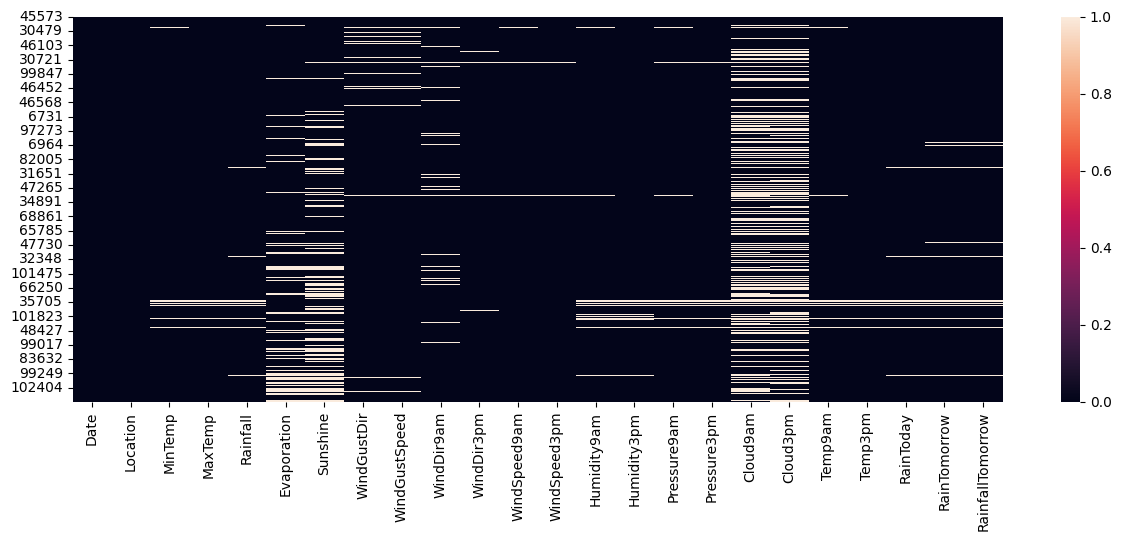

In [81]:
# Visualización de los nulos en una sección del dataframe
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [82]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)

           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\2123146174.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')


In [83]:
# Vamos a fusionar Sydney y Melbourne con sus aeropuertos, considerando que esto va a reducir los datos nulos.
df = df.sort_values(by='Date', ignore_index=True)
df_Sydney = df[(df["Location"]=="Sydney")]
df_aSydney = df[(df["Location"]=="SydneyAirport")]
df_Melbourne = df[(df["Location"]=="Melbourne")]
df_AMelbourne = df[(df["Location"]=="MelbourneAirport")]

# Hacemos un join outer sobre "Date" para mantener todos los registros
df_s = df_Sydney.merge(df_aSydney, on='Date', how='outer', suffixes=('', '_ASydney'))
df_m = df_Melbourne.merge(df_AMelbourne, on='Date', how='outer', suffixes=('', '_AMelbourne'))

# Eliminamos la columna Location_Aeropuerto que no necesitamos, y llenamos las vacías con lo que corresponda para cada ciudad
# (en caso de que el registro haya existido en el aeropuerto, y no en la ciudad)
df_s.drop("Location_ASydney", axis=1, inplace=True)
df_m.drop("Location_AMelbourne", axis=1, inplace=True)
df_s["Location"] = "Sydney"
df_m["Location"] = "Melbourne"

In [84]:
# Generamos una lista de columnas numéricas y categóricas que tiene sentido ser completadas con los valores de los aeropuertos.
columnas_numericas = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', "Rainfall", 'RainfallTomorrow', "WindGustSpeed","WindSpeed9am","WindSpeed3pm"]
columnas_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Completamos nulos para esas columnas, y a su vez las eliminamos
for columna in columnas_numericas+columnas_categoricas:
    columna_as = columna+"_ASydney"
    columna_am = columna+"_AMelbourne"
    df_s[columna] = df_s[columna].fillna(df_s[columna_as])
    df_m[columna] = df_m[columna].fillna(df_m[columna_am])
    df_s.drop(columna_as, axis=1, inplace=True)
    df_m.drop(columna_am, axis=1, inplace=True)


# Chequeemos que no rompimos nada a nivel columnas
print(df_m.shape[1] == df_s.shape[1])
print(df.shape[1] == df_s.shape[1])
#print(df_m.head())

print("Tamaño pre-mergeo: "+str(df.shape))
# Generemos el nuevo dataframe
df_without_sydney_melbourne = df[(df["Location"]!="Sydney")&(df["Location"]!="SydneyAirport")&(df["Location"]!="Melbourne")&(df["Location"]!="MelbourneAirport")]
df = pd.concat([df_without_sydney_melbourne, df_s, df_m], ignore_index=True)
print("Tamaño post-mergeo: "+str(df.shape))

# Mejoramos un poco los porcentajes?
porcentaje_nulos_2 = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas_2 = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres_2 = pd.DataFrame({'Nombre de columna': porcentaje_nulos_2.index, 'Porcentaje de nulos': porcentaje_nulos_2.values})

print("Nulos, por ciudad, pre mergeo con aeropuertos: ")
print(null_counts_country)
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print("Nulos, por ciudad, post mergeo con aeropuertos: ")
print(null_counts_country)


True
True
Tamaño pre-mergeo: (28233, 24)
Tamaño post-mergeo: (22217, 24)
Nulos, por ciudad, pre mergeo con aeropuertos: 
           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220
Nulos, por ciudad, post mergeo con aeropuertos: 
       Location  Total_Nulos
0      Adelaide        10091
1      Canberra         8375
2         Cobar         4057
3      Dartmoor         8909
4     Melbourne           80
5  MountGambier         1373
6        Sydney          808


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\3821370992.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')


# Transformación de variables categóricas

In [85]:
# Veamos sobre cuál hacer one hot encoding
columnas_object = df.select_dtypes(include=['object'])
print(columnas_object)

        Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0       Canberra          NW         SW         NW        No          Yes
1       Canberra         ENE          E          W       Yes          Yes
2       Canberra          NW          N        NNE       Yes          Yes
3       Canberra          NW        WNW          W       Yes          Yes
4       Canberra         SSE        SSE        ESE       Yes           No
...          ...         ...        ...        ...       ...          ...
22212  Melbourne           N        NNE          N        No           No
22213  Melbourne         NNW          W          S        No           No
22214  Melbourne           N        NNE          N        No           No
22215  Melbourne         NNW          N          N        No          Yes
22216  Melbourne          SW        WNW          S       Yes           No

[22217 rows x 6 columns]


In [86]:
# Elegimos estas:
palabrasObject = ["Location",  "RainToday", "RainTomorrow"]
df = pd.get_dummies(df, columns = palabrasObject, drop_first=True, dtype=int)
print(df)

            Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2007-11-01      8.0     24.3       0.0          3.4       6.3   
1     2007-11-02     14.0     26.9       3.6          4.4       9.7   
2     2007-11-03     13.7     23.4       3.6          5.8       3.3   
3     2007-11-04     13.3     15.5      39.8          7.2       9.1   
4     2007-11-05      7.6     16.1       2.8          5.6      10.6   
...          ...      ...      ...       ...          ...       ...   
22212 2017-06-20      6.4     15.8       0.0          2.4       8.8   
22213 2017-06-21      7.8     13.5       0.6          0.6       0.0   
22214 2017-06-22      6.7     14.1       0.2          0.6       0.0   
22215 2017-06-23      7.4     14.9       0.0          1.6       6.0   
22216 2017-06-24      8.3     12.3       1.4          1.8       5.6   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Temp3pm  \
0              NW           30.0         SW         NW  ...     23.6   
1  

In [87]:
# Si imaginamos los puntos cardinales sobre un eje cartesiano, podemos codificar cada punto como un ángulo (polar).
# Codifiquemos: ["WindGustDir", "WindDir9am", "WindDir3pm"]
gust = list(df["WindGustDir"].unique())
am = list(df["WindDir9am"].unique())
pm = list(df["WindDir3pm"].unique())

values = ['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE', 'NNW', 'SW', 'W', 'WSW', 'SSW']
codes = [315, 67.5, 157.5, 135, 90, 180, 0, 292.5, 112.5, 45, 22.5, 337.5, 225, 270, 247.5, 202.5]
wind_coded = pd.DataFrame({'value': values, 'code': codes})

# Reemplazar los valores originales por los codificados
for columna in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[columna] = df[columna].replace(dict(zip(wind_coded['value'], wind_coded['code'])))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   22217 non-null  datetime64[ns]
 1   MinTemp                22132 non-null  float64       
 2   MaxTemp                22142 non-null  float64       
 3   Rainfall               22000 non-null  float64       
 4   Evaporation            17913 non-null  float64       
 5   Sunshine               15521 non-null  float64       
 6   WindGustDir            21316 non-null  float64       
 7   WindGustSpeed          21319 non-null  float64       
 8   WindDir9am             20678 non-null  float64       
 9   WindDir3pm             21830 non-null  float64       
 10  WindSpeed9am           21889 non-null  float64       
 11  WindSpeed3pm           21900 non-null  float64       
 12  Humidity9am            21784 non-null  float64       
 13  H

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\722098061.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna] = df[columna].replace(dict(zip(wind_coded['value'], wind_coded['code'])))


In [88]:
"""
# Transformemos las fechas
df['Date'] = pd.to_datetime(df['Date'])
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Dia_Semana'] = df['Date'].dt.day_of_week
# Eliminamos la fecha del df
df.drop(columns= "Date", inplace=True, axis= 1)
anios = df.Ano.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) """

# Cambiamos de enfoque porque consideramos necesario capturar con los datos "lo cíclico" de un año y los patrones
# propios de las estaciones del año.

# Convertimos la columna 'fecha' al tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Extraemos el día del año (1 a 365)
df['dia'] = df['Date'].dt.dayofyear

# Calculamos la característica trigonométrica (solo el seno)
df['dia'] = np.sin(2 * np.pi * df['dia'] / 365)

# Agregamos el año como una característica adicional
df['año'] = df['Date'].dt.year

df.drop("Date", axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22132 non-null  float64
 1   MaxTemp                22142 non-null  float64
 2   Rainfall               22000 non-null  float64
 3   Evaporation            17913 non-null  float64
 4   Sunshine               15521 non-null  float64
 5   WindGustDir            21316 non-null  float64
 6   WindGustSpeed          21319 non-null  float64
 7   WindDir9am             20678 non-null  float64
 8   WindDir3pm             21830 non-null  float64
 9   WindSpeed9am           21889 non-null  float64
 10  WindSpeed3pm           21900 non-null  float64
 11  Humidity9am            21784 non-null  float64
 12  Humidity3pm            21839 non-null  float64
 13  Pressure9am            21886 non-null  float64
 14  Pressure3pm            21893 non-null  float64
 15  Cl

In [89]:
"""
# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y
# del día posterior a este, y sino, del año anterior y posterior,
# y devuelve un promedio del par que corresponda.
#print(df)
def promedio(fech, location, data, columna):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
    x1 = data[(data['Date'] == fecha_dia_desp) & (data["Location"]==location)][columna]
    x2 = data[(data['Date'] == fecha_dia_ant) & (data["Location"]==location)][columna]
    x3 = data[(data['Date'] == fecha_anio_anterior) & (data["Location"]==location)][columna]
    x4 = data[(data['Date'] == fecha_anio_posterior) & (data["Location"]==location)][columna]

    datos1 = [df.iloc[0] for df in [x1, x2] if df.shape[0] != 0]
    datos2 = [df.iloc[0] for df in [x3, x4] if df.shape[0] != 0]

    # Si no hay dataframes no nulos, devolver None
    if len(datos1) == 0:
        if len(datos2) == 0:
            return None
        else:
            promedio = sum(datos2)/len(datos2)
            return promedio
    else:
        promedio = sum(datos1)/len(datos1)
        return promedio

z = promedio("2009-01-01", "Cobar", df, "MinTemp")
print(z)
"""

'\n# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y\n# del día posterior a este, y sino, del año anterior y posterior,\n# y devuelve un promedio del par que corresponda.\n#print(df)\ndef promedio(fech, location, data, columna):\n    fecha = pd.to_datetime(fech)\n    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime(\'%Y-%m-%d\')\n    \n    x1 = data[(data[\'Date\'] == fecha_dia_desp) & (data["Location"]==location)][columna]\n    x2 = data[(data[\'Date\'] == fecha_dia_ant) & (data["Location"]==location)][columna]\n    x3 = data[(data[\'Date\'] == fecha_anio_anterior) & (data["Location"]==location)][columna]\n    x4 = data[(data[\'Date\'] == fecha_anio_posterior) & (data["Location"]==location)][

In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22132 non-null  float64
 1   MaxTemp                22142 non-null  float64
 2   Rainfall               22000 non-null  float64
 3   Evaporation            17913 non-null  float64
 4   Sunshine               15521 non-null  float64
 5   WindGustDir            21316 non-null  float64
 6   WindGustSpeed          21319 non-null  float64
 7   WindDir9am             20678 non-null  float64
 8   WindDir3pm             21830 non-null  float64
 9   WindSpeed9am           21889 non-null  float64
 10  WindSpeed3pm           21900 non-null  float64
 11  Humidity9am            21784 non-null  float64
 12  Humidity3pm            21839 non-null  float64
 13  Pressure9am            21886 non-null  float64
 14  Pressure3pm            21893 non-null  float64
 15  Cl

In [91]:
# Volvamos a estos porcentajes, y cómo mejorarlos
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                 0.38
1                 MaxTemp                 0.34
2                Rainfall                 0.98
3             Evaporation                19.37
4                Sunshine                30.14
5             WindGustDir                 4.06
6           WindGustSpeed                 4.04
7              WindDir9am                 6.93
8              WindDir3pm                 1.74
9            WindSpeed9am                 1.48
10           WindSpeed3pm                 1.43
11            Humidity9am                 1.95
12            Humidity3pm                 1.70
13            Pressure9am                 1.49
14            Pressure3pm                 1.46
15               Cloud9am                34.95
16               Cloud3pm                35.47
17                Temp9am                 0.44
18                Temp3pm                 0.39
19       RainfallTomorrow                 0.97
20      Locat

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\573580452.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city[variable] = city[variable].fillna(city[variable].shift())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\573580452.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city[variable] = city[variable].fillna(city[variable].shift(-1))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\573580452.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

<Axes: >

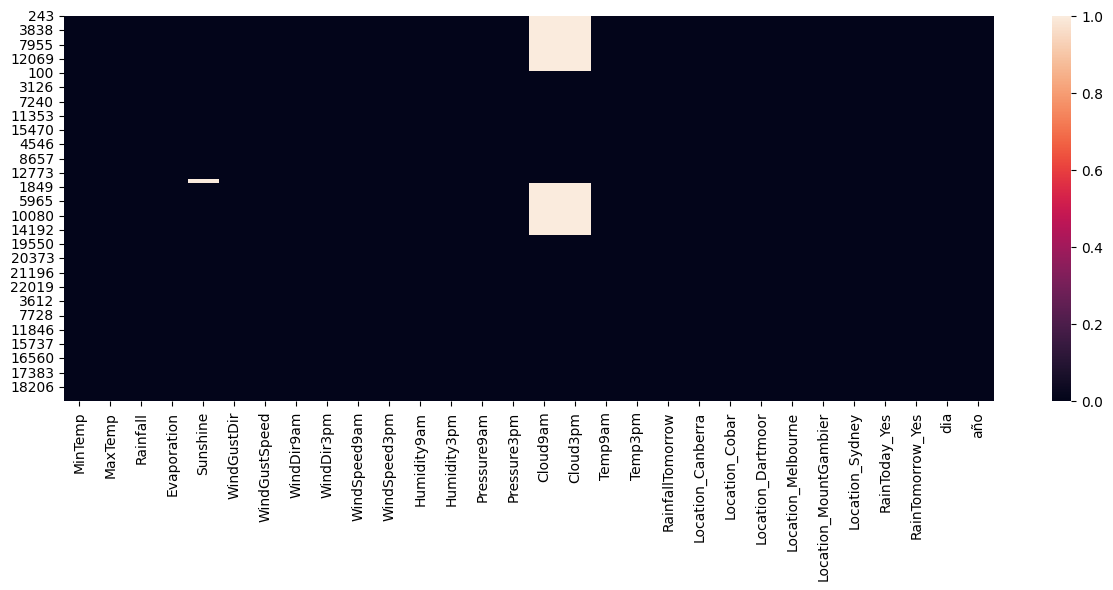

In [92]:
cities = ['Location_Canberra', 'Location_Cobar', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MountGambier', 'Location_Sydney']
df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]

df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

for city in df_cities:
    for variable in list(df.columns):
        # Rellenamos los valores nulos con el valor de los tres días anteriores/siguientes (de este año o el siguiente)
        # si existen (pues el df está ordenado por fecha)
        city[variable] = city[variable].fillna(city[variable].shift())
        city[variable] = city[variable].fillna(city[variable].shift(-1))
        city[variable] = city[variable].fillna(city[variable].shift(2))
        city[variable] = city[variable].fillna(city[variable].shift(-2))
        city[variable] = city[variable].fillna(city[variable].shift(3))
        city[variable] = city[variable].fillna(city[variable].shift(-3))

        city[variable] = city[variable].fillna(city[variable].shift(365))
        city[variable] = city[variable].fillna(city[variable].shift(-1*365))
        city[variable] = city[variable].fillna(city[variable].shift(2*365))
        city[variable] = city[variable].fillna(city[variable].shift(-2*365))
        city[variable] = city[variable].fillna(city[variable].shift(3*365))
        city[variable] = city[variable].fillna(city[variable].shift(-3*365))
df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())


In [93]:
# Porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                 0.00
1                 MaxTemp                 0.00
2                Rainfall                 0.00
3             Evaporation                 0.00
4                Sunshine                 1.09
5             WindGustDir                 0.00
6           WindGustSpeed                 0.00
7              WindDir9am                 0.00
8              WindDir3pm                 0.00
9            WindSpeed9am                 0.00
10           WindSpeed3pm                 0.00
11            Humidity9am                 0.00
12            Humidity3pm                 0.00
13            Pressure9am                 0.00
14            Pressure3pm                 0.00
15               Cloud9am                27.91
16               Cloud3pm                27.91
17                Temp9am                 0.00
18                Temp3pm                 0.00
19       RainfallTomorrow                 0.00
20      Locat

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\3666976756.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  city[variable].fillna(mediana, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\3666976756.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city[variable].fillna(mediana, inplace=True)
C:\Users\Usuario\AppDat

<Axes: >

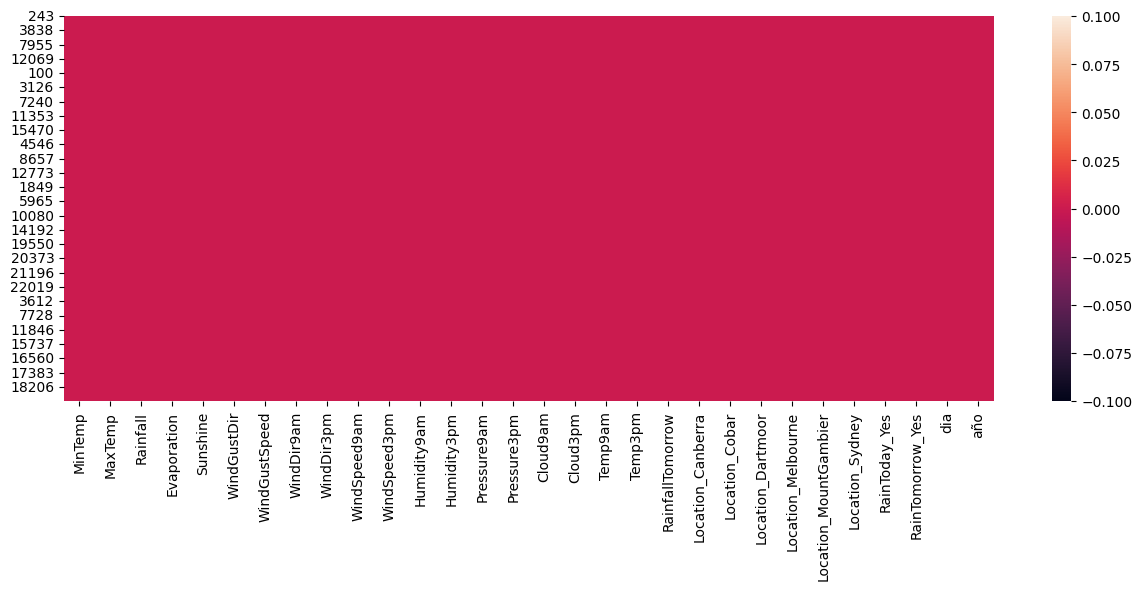

In [94]:
# Terminemos de completar faltantes con la mediana de los datos, discriminando por ciudad
df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]
df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

columns = ["Sunshine", "Cloud9am", "Cloud3pm"]

for city in df_cities:
    for variable in columns:
        mediana = city[variable].median()
        promedio_total = df[variable].mean()
        city[variable].fillna(mediana, inplace=True)
        city[variable].fillna(promedio_total, inplace=True)

df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [95]:
# Porcentajes finales
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

        Nombre de columna  Porcentaje de nulos
0                 MinTemp                  0.0
1                 MaxTemp                  0.0
2                Rainfall                  0.0
3             Evaporation                  0.0
4                Sunshine                  0.0
5             WindGustDir                  0.0
6           WindGustSpeed                  0.0
7              WindDir9am                  0.0
8              WindDir3pm                  0.0
9            WindSpeed9am                  0.0
10           WindSpeed3pm                  0.0
11            Humidity9am                  0.0
12            Humidity3pm                  0.0
13            Pressure9am                  0.0
14            Pressure3pm                  0.0
15               Cloud9am                  0.0
16               Cloud3pm                  0.0
17                Temp9am                  0.0
18                Temp3pm                  0.0
19       RainfallTomorrow                  0.0
20      Locat

# Matriz de Correlación

Con el fin de identificar patrones de correlación en los datos, calculamos la matriz de corrlación entre todas las columnas del df.
Vale aclarar que el coeficiente de correlación lo aplicamos entre la columna 'RainfallTomorrow' y las restantes columnas.
En este caso vamos analizar lo siguiente:
- Si el coeficiente de correlación es cercano a 1, indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
- Si el coeficiente de correlación es cercano a -1, indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
- Si el coeficiente de correlación es cercano a 0, indica que no hay una correlación lineal fuerte entre las dos variables.

In [96]:
# Matriz de correlación entre todas las columnas y RainTomorrow_Yes
# Eliminamos las columnas que no vamos a predecir con el modelo de regresión
df_regresion = df.drop(columns = ["RainToday_Yes", "RainTomorrow_Yes"], axis= 1)
print(df_regresion.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22217 entries, 243 to 19024
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22217 non-null  float64
 1   MaxTemp                22217 non-null  float64
 2   Rainfall               22217 non-null  float64
 3   Evaporation            22217 non-null  float64
 4   Sunshine               22217 non-null  float64
 5   WindGustDir            22217 non-null  float64
 6   WindGustSpeed          22217 non-null  float64
 7   WindDir9am             22217 non-null  float64
 8   WindDir3pm             22217 non-null  float64
 9   WindSpeed9am           22217 non-null  float64
 10  WindSpeed3pm           22217 non-null  float64
 11  Humidity9am            22217 non-null  float64
 12  Humidity3pm            22217 non-null  float64
 13  Pressure9am            22217 non-null  float64
 14  Pressure3pm            22217 non-null  float64
 15  Cloud

* Entrenaremos nuestro modelo sin distinguir por ciudad, ya que la muestra que tomamos son de ciudades que pertenecen a la misma categoría climática de la clasificación Köppen-Geiger*

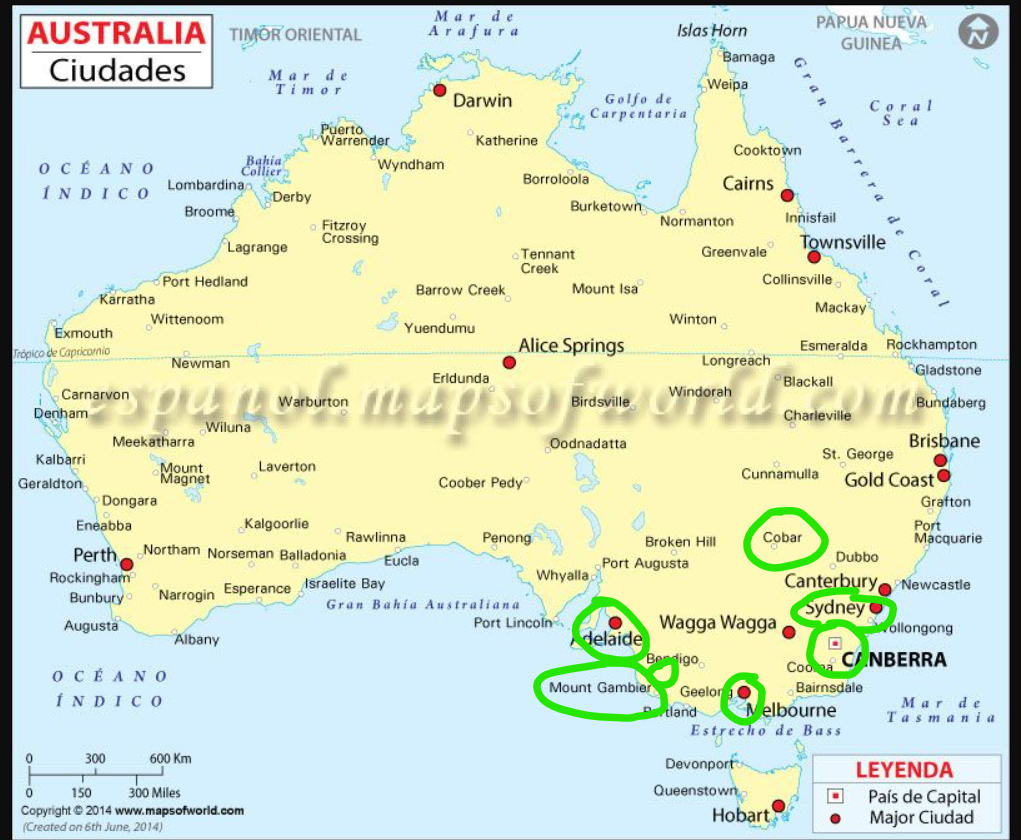
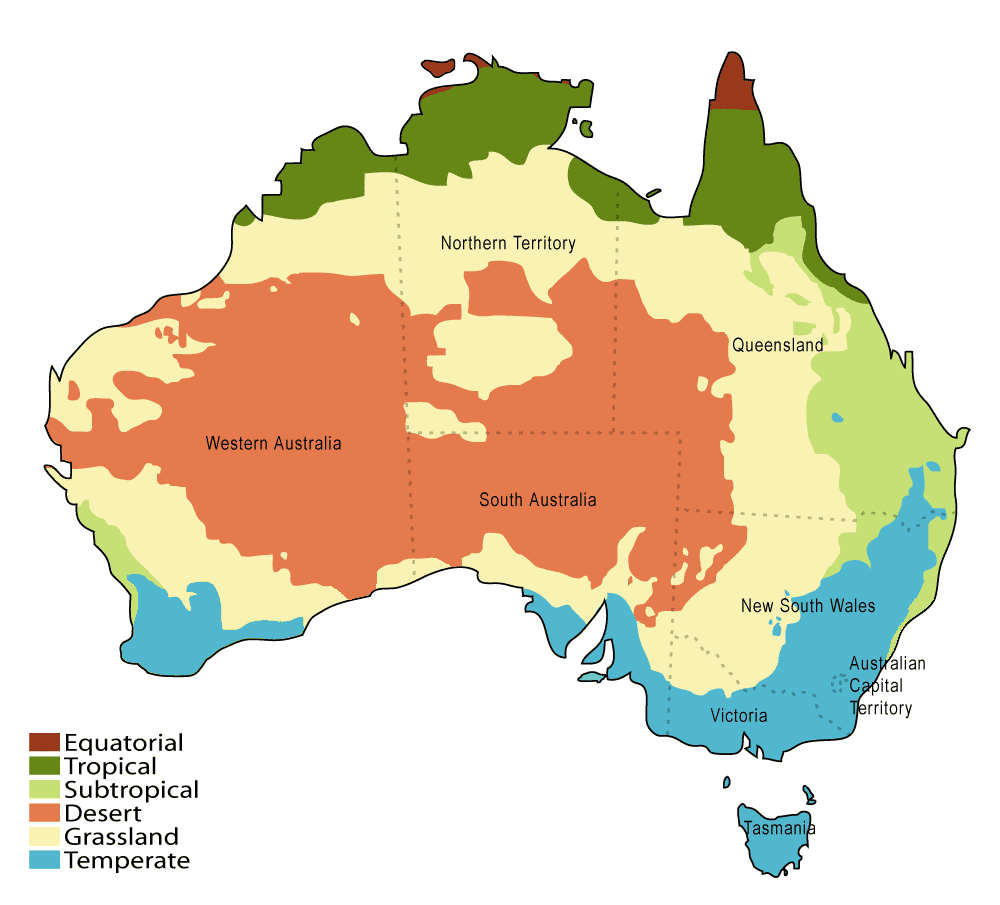

In [97]:
todas_las_columnas = list(df_regresion.columns)
columnas = []
for i in todas_las_columnas:
    if "Location" not in i:
        columnas.append(i)

# Hacemos esto para que RainfallTomorrow quede primera y mejorar la visualización
columnas.remove("RainfallTomorrow")
columnas = ["RainfallTomorrow"] + columnas
corr = df_regresion[columnas].corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [98]:
corr = df_regresion[columnas].corr()

# Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

# Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)
order = corr_with_target_abs.index

# Obtenemos las top 10 variables con mayor aporte
top_10_variables = order[1:11]  # Excluimos la variable "RainfallTomorrow" en sí misma

features = top_10_variables.tolist()
print('Variables con mayor correlación a RainfallTomorrow')
print(features)

Variables con mayor correlación a RainfallTomorrow
['Humidity3pm', 'Rainfall', 'Sunshine', 'Cloud3pm', 'Pressure3pm', 'WindGustSpeed', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm']


Armamos un nuevo data set que solo contiene a esas columnas

In [100]:
data_new = df_regresion[features]


Separamos nuestro dataset en la variable independiente y las variables dependientes.
La variable dependiente es 'RailfallTomorrow' y las variables dependientes todas las demás columnas.

In [102]:
X = data_new
y = df_regresion['RainfallTomorrow']
print(X.columns)

Index(['Humidity3pm', 'Rainfall', 'Sunshine', 'Cloud3pm', 'Pressure3pm',
       'WindGustSpeed', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm'],
      dtype='object')


In [103]:
#¿Cuántas columnas tiene X? Es decir, ¿cuántas variables independientes tenemos?
len(X.columns)

10

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

In [105]:
X_train.shape

(17773, 10)

In [106]:
y_train.shape

(17773, 1)

In [107]:
X_train.columns

Index(['Humidity3pm', 'Rainfall', 'Sunshine', 'Cloud3pm', 'Pressure3pm',
       'WindGustSpeed', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm'],
      dtype='object')

In [40]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17773 entries, 18013 to 22177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity3pm    17773 non-null  float64
 1   Rainfall       17773 non-null  float64
 2   Sunshine       17773 non-null  float64
 3   Cloud3pm       17773 non-null  float64
 4   Pressure3pm    17773 non-null  float64
 5   WindGustSpeed  17773 non-null  float64
 6   Pressure9am    17773 non-null  float64
 7   Cloud9am       17773 non-null  float64
 8   Humidity9am    17773 non-null  float64
 9   Temp3pm        17773 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB
None


# Algoritmos de Regresión Lineal

## Regresión lineal

In [41]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar. 
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

El método fit que se utiliza a continuación ajusta el modelo a los datos de entrenamiento, lo que significa que el modelo aprenderá de los ejemplos de entrenamiento y ajustará sus parámetros internos de manera que sea capaz de hacer predicciones en función de esos datos.

In [42]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [43]:
lr = model.fit(X_train, y_train)

In [44]:
model.steps[0]

('standardscaler', StandardScaler())

In [45]:
model.steps[1][1].n_features_in_

10

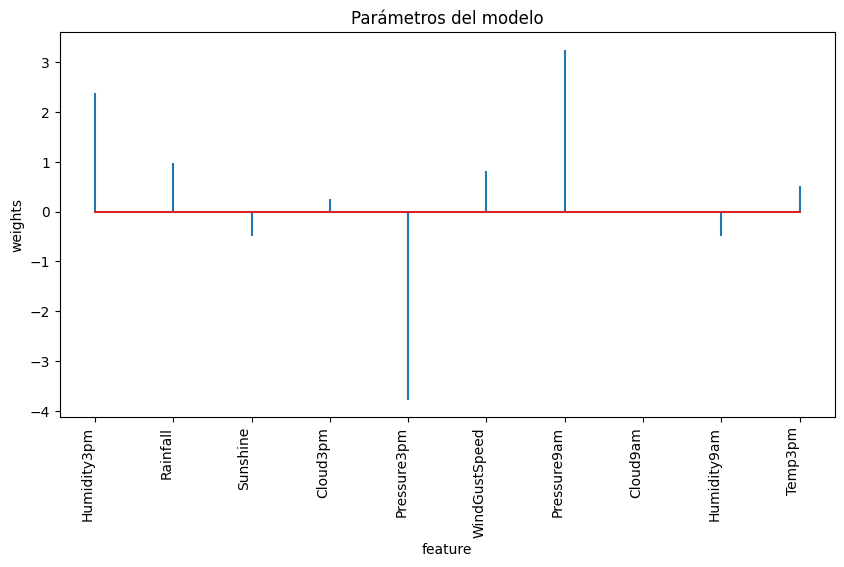

In [46]:
#Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [47]:
df_coeficientes

predictor      coef
0    Humidity3pm  2.375738
1       Rainfall  0.970341
2       Sunshine -0.489284
3       Cloud3pm  0.257096
4    Pressure3pm -3.773404
5  WindGustSpeed  0.812783
6    Pressure9am  3.253920
7       Cloud9am -0.007750
8    Humidity9am -0.488272
9        Temp3pm  0.512678

En el gráfico de tallo anterior podemos ver como influyen las distintas características a las predicciones. Podemos observar que la variable que más impacto tiene es 'Preassure3pm', seguida por 'Preassure9am' y 'Pressure3pm

In [48]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

((4444, 1), (4444, 1))

Calculamos algunas métricas para evaluar el modelo

In [49]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error (rmse) de test es: ",rmse_ols.round(4))

El error (rmse) de test es:  5.4174


Un RMSE de 5.4174 indica que, en promedio, las predicciones del modelo están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4174 unidades en la misma escala que los valores objetivo, es decir mm. Esto significa que, en promedio, las predicciones del modelo tienden a estar a unos 5.4174 mm de distancia de las etiquetas reales. Que en contextos de lluvia es relativamente poco.

In [50]:
rl_R2 = metrics.r2_score(y_test, y_pred)
print('El coeficiente de regresión es: ',rl_R2.round(4))

El coeficiente de regresión es:  0.22


Aproximadamente el 22% de la variabilidad de la variable dependiente puede ser explicada por la variabilidad de la variable independiente en un modelo de regresión.

Un R2 de 0.22 no es muy alto, lo que sugiere que el modelo no explica la mayoría de la variabilidad en la variable dependiente. Esto puede deberse a varias razones, como la falta de ajuste del modelo, la presencia de variables omitidas importantes, la presencia de errores de medición en los datos, entre otros factores.

Tambien calculamos esta métricas con los datos de train

In [51]:
# new
y_pred_2 = model.predict(X_train)
rl_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ols_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(rl_R2_train, rmse_ols_train)

Métricas de entrenamiento
0.22340284067385674 5.31539218981632


In [52]:
(y_test - y_pred).shape

(4444, 1)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

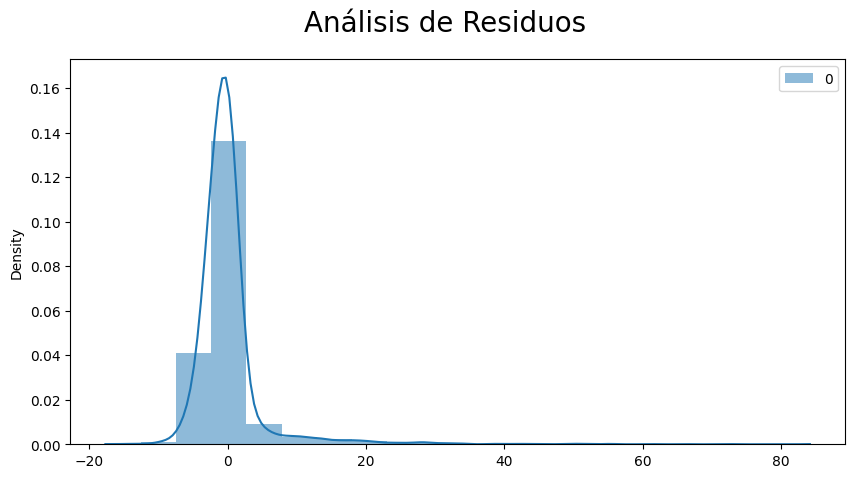

In [53]:
fig = plt.figure(figsize=(10,5))
  
sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

Vemos que el histograma muestra una distribución asimétrica, con una cola larga a la derecha, puede indicar que el modelo no está capturando completamente la variabilidad en los datos. Esto puede sugerir que el modelo tiene sesgos o que hay patrones no lineales en los datos que no se están teniendo en cuenta.
De todos modos se puede observar que los residuos tienen una distribución alrededor de cero, lo que significa que, en promedio, no debería haber un sesgo sistemático en las predicciones del modelo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\3270093346.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(y_test,100*(y_test-y_pred)/y_test)


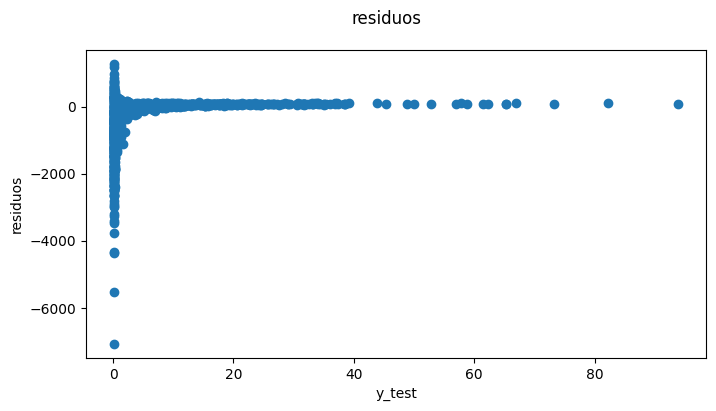

In [54]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

## Ridge

In [55]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(), 
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

In [56]:
ridge = modelo.fit(X_train, y_train)

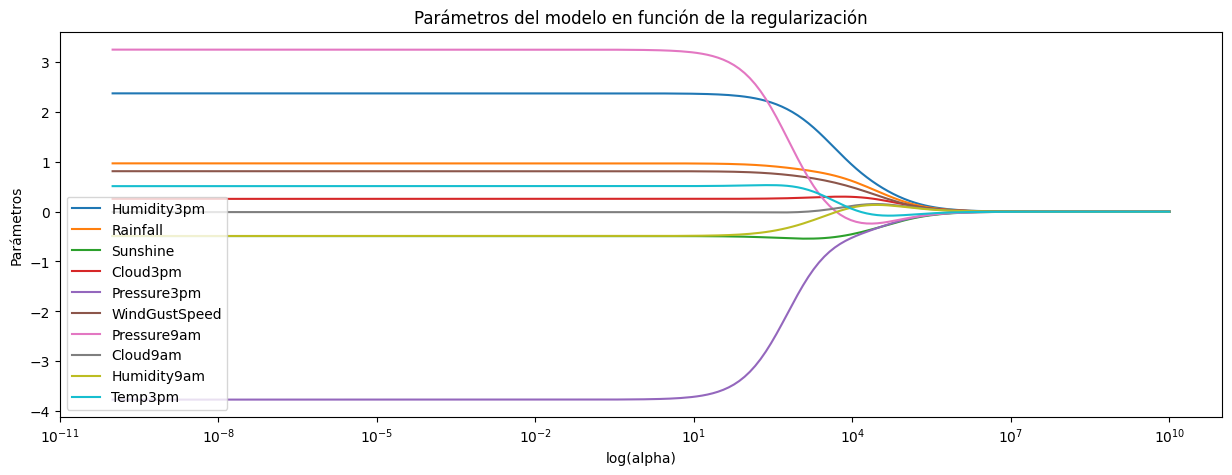

In [57]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el gráfico anterior podemos observar que a medida que alpha aumenta, la regularización se vuelve más fuerte, y los coeficientes tienden a disminuir hacia cero. Esto es una característica de Ridge, que ayuda a evitar el sobreajuste al penalizar coeficientes más grandes.

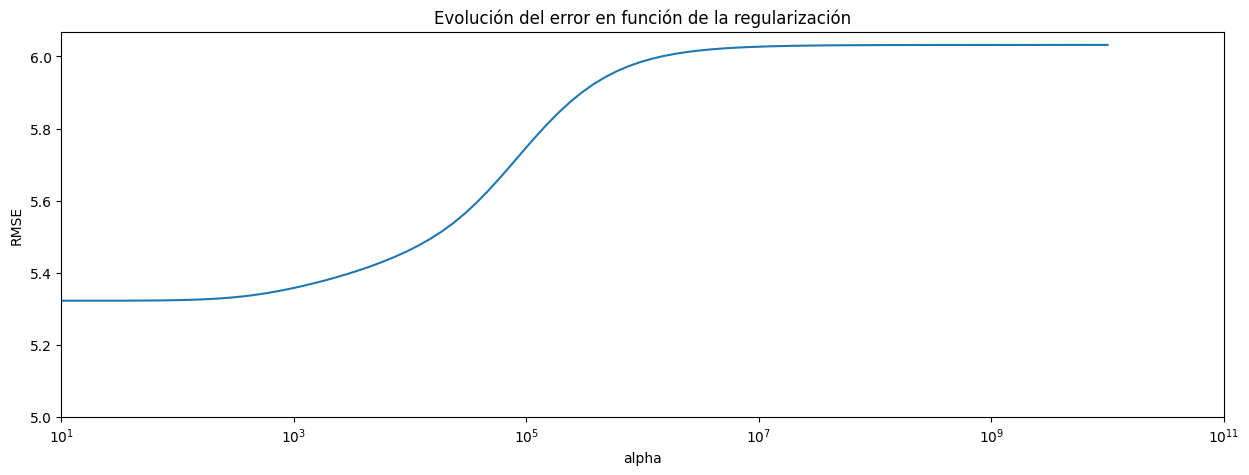

In [58]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_xlim([10,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

A medida que alpha aumenta (la regularización se vuelve más fuerte), el RMSE de CV tiende a aumentar. Esto se debe a que la regularización penaliza coeficientes más grandes, lo que puede hacer que el modelo se ajuste menos a los datos de entrenamiento.

In [59]:
# Mejor valor alpha encontrado
alfa=mod.alpha_.round(4)
print(f"Mejor valor de alpha encontrado:", alfa)

Mejor valor de alpha encontrado: 2.2478


Este es el valor específico de alpha que minimiza el error (RMSE) en el conjunto de validación cruzada. Indica cuánta regularización se debe aplicar al modelo para obtener un equilibrio óptimo entre el ajuste a los datos y la capacidad de generalización.

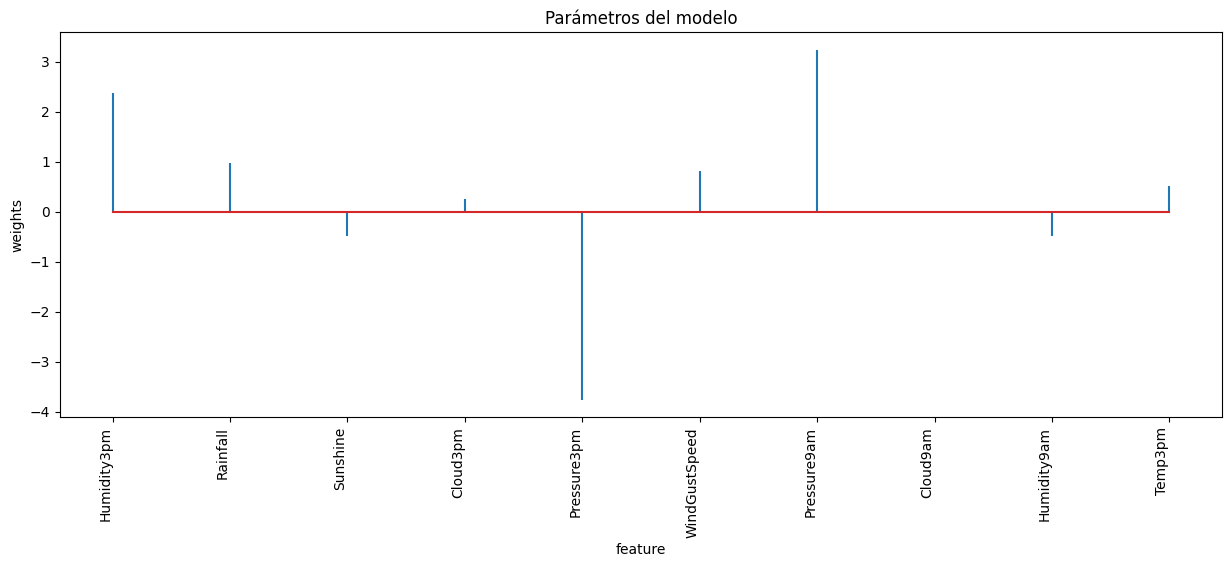

In [60]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [61]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [62]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print("El error (rmse) de test es: ", rmse_ridge.round(4))

El error (rmse) de test es:  5.4175


El error (RMSE) de test es: 5.4175 significa que, en promedio, las predicciones del modelo Ridge están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4175 unidades en la misma escala que los valores objetivo. Esto sugiere que el modelo Ridge tiene un rendimiento muy similar al modelo de regresión lineal utilizado anteriormente.

In [63]:
ridge_R2 = metrics.r2_score(y_test, y_pred)
print("El coeficiente de regresión es de: ", ridge_R2.round(4))

El coeficiente de regresión es de:  0.22


Dado que el R-cuadrado del modelo Ridge es muy similar al R-cuadrado del modelo de regresión lineal, parece que ambos modelos tienen un rendimiento bastante similar en términos de su capacidad para explicar la variabilidad en los datos.

In [64]:
# new
y_pred_2 = model.predict(X_train)
ridge_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ridge_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(ridge_R2_train, rmse_ridge_train)

Métricas de entrenamiento
0.22340284067385674 5.31539218981632


## Lasso Regression

In [65]:
modelo = make_pipeline(StandardScaler(), 
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
lasso = modelo.fit(X_train, y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


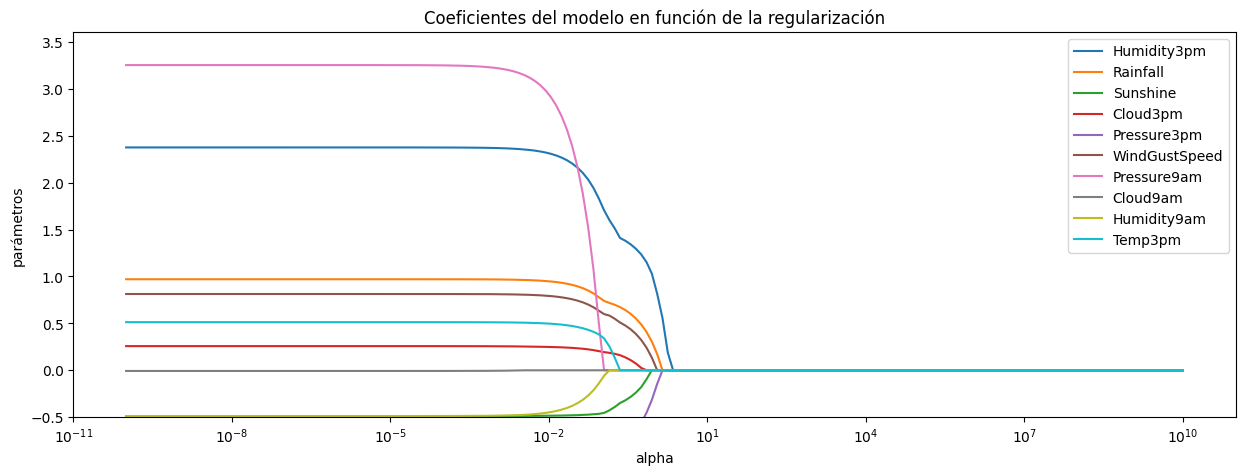

In [67]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

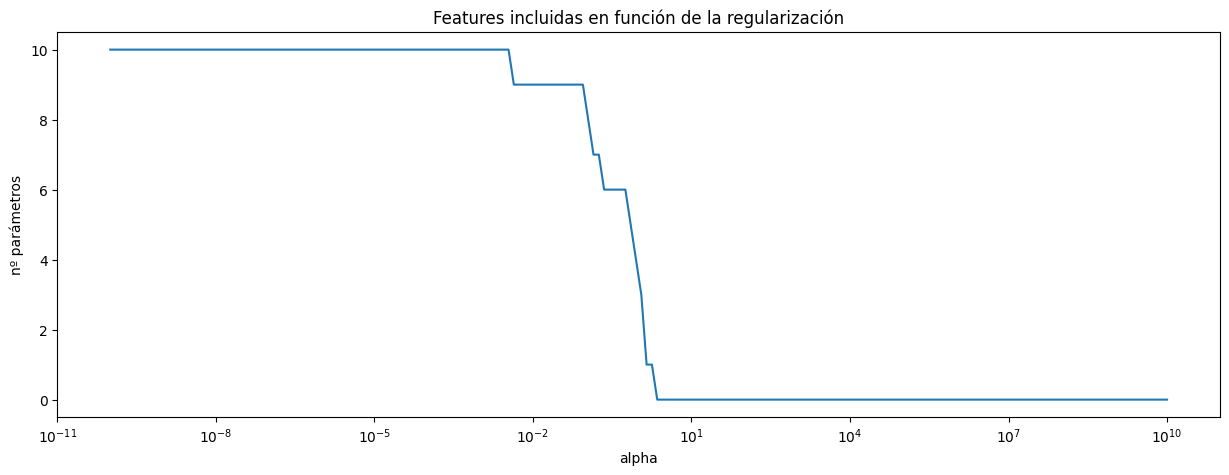

In [68]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

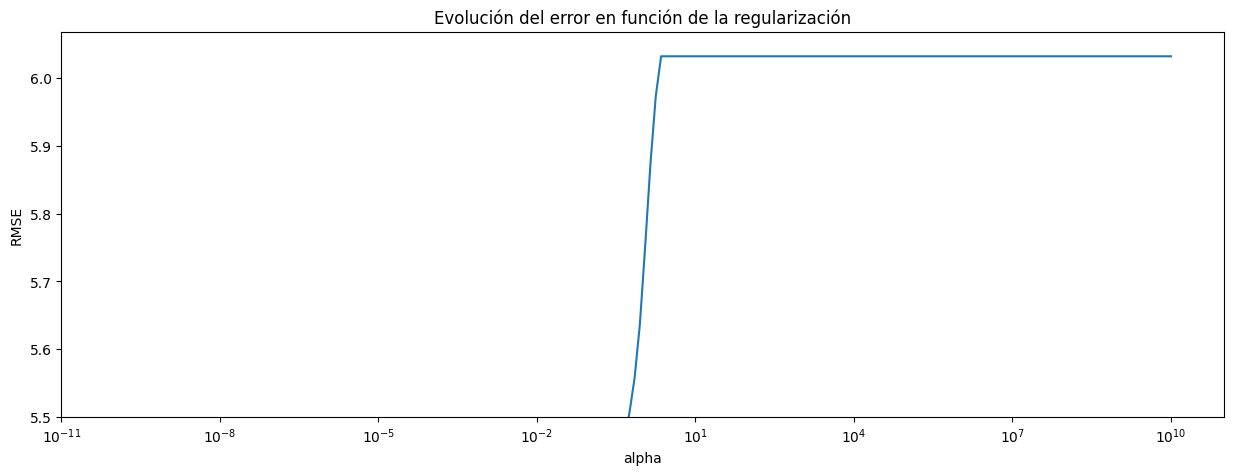

In [69]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5.5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [70]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.0017225859653987874


In [71]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0    Humidity3pm  2.364868
1       Rainfall  0.966501
2       Sunshine -0.488142
3       Cloud3pm  0.254813
4    Pressure3pm -3.723763
5  WindGustSpeed  0.809259
6    Pressure9am  3.200445
7       Cloud9am -0.004292
8    Humidity9am -0.481942
9        Temp3pm  0.509809

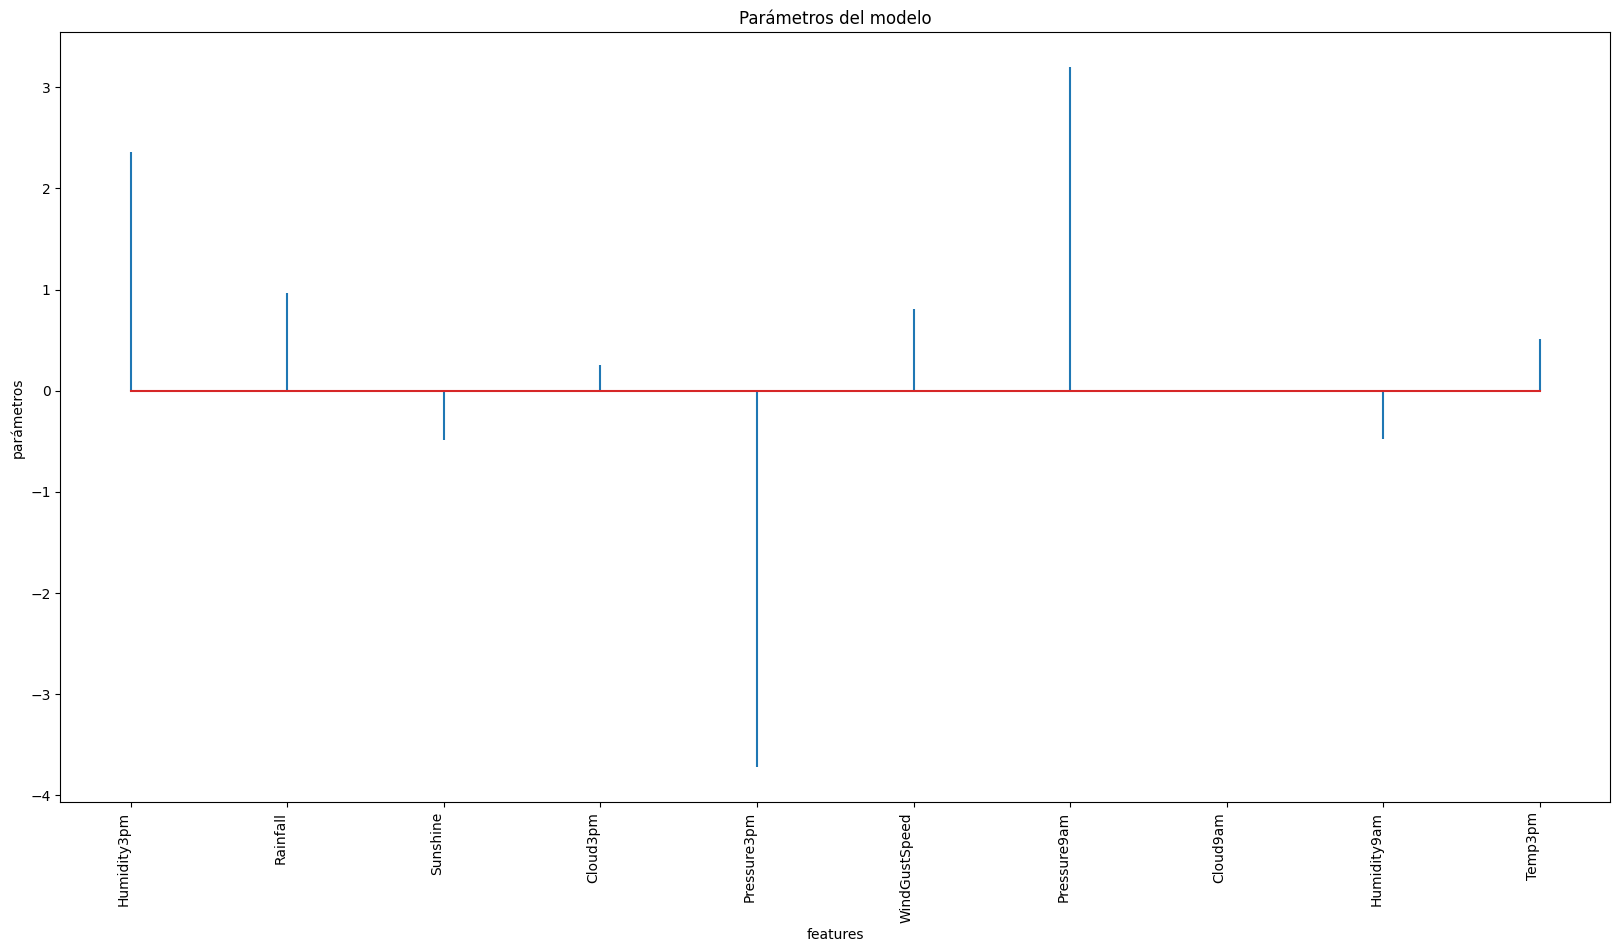

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [73]:
y_pred = modelo.predict(X_test)

In [74]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 5.417831815859313


In [75]:
lasso_R2 = metrics.r2_score(y_test, y_pred)
lasso_R2

0.2199261216022672

In [76]:
# new
y_pred_2 = model.predict(X_train)
lasso_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_lasso_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(lasso_R2_train, rmse_lasso_train)

Métricas de entrenamiento
0.22340284067385674 5.31539218981632


In [77]:
# Esto lo coreemos para ver como nos estan dando los valores --> borrarlo posteriormente
print(rl_R2)
print(ridge_R2)
print(lasso_R2)
print(rmse_ols)
print(rmse_lasso)
print(rmse_ridge)

0.22004364315970215
0.22003271795754953
0.2199261216022672
5.41742369040272
5.417831815859313
5.417461632424209


## ElasticNet

In [78]:
modelo = make_pipeline(StandardScaler(), 
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not co

In [79]:
# Como lo anterior no se puede mostrar, lo mostramos de la siguiente forma
import pprint

# Imprimir el modelo detalladamente
pprint.pprint(mod)

ElasticNetCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.289890...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])


In [80]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv


l1_ratio   mod.alphas_     mse_cv   rmse_cv
1327      0.99  1.722586e-03  28.296238  5.319421
1328      0.99  1.366716e-03  28.296241  5.319421
1329      0.99  1.084366e-03  28.296261  5.319423
1326      0.99  2.171118e-03  28.296265  5.319423
1128      0.95  1.366716e-03  28.296268  5.319424
...        ...           ...        ...       ...
1022      0.95  6.150986e+07  36.383662  6.031887
1023      0.95  4.880252e+07  36.383662  6.031887
1024      0.95  3.872039e+07  36.383662  6.031887
1018      0.95  1.552225e+08  36.383662  6.031887
1055      0.95  2.967302e+04  36.383662  6.031887

[1400 rows x 4 columns]

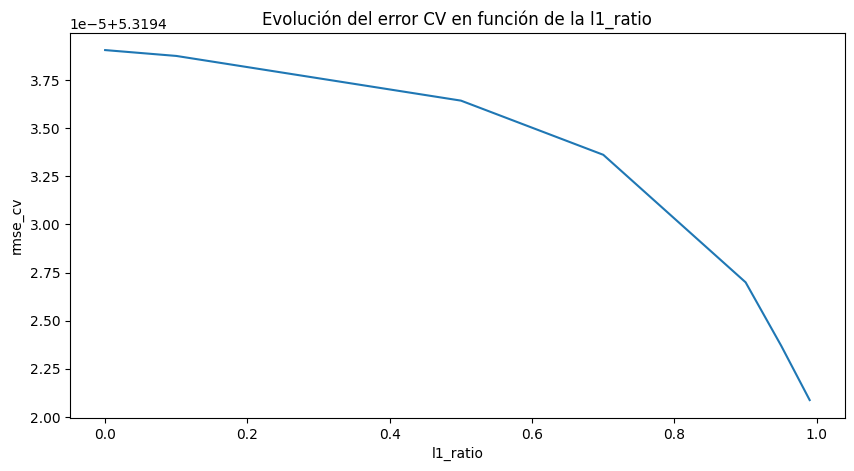

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

El gráfico muestra una curva que representa cómo cambia el RMSE de CV a medida que varía el valor de l1_ratio. Esta curva te permite identificar el valor óptimo de l1_ratio que minimiza el RMSE de CV y, por lo tanto, proporciona el mejor rendimiento del modelo.

In [82]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: ", mod.alpha_.round(4))
print(f"Mejor valor de l1_ratio encontrado:", mod.l1_ratio_)

Mejor valor de alpha encontrado:  0.0017
Mejor valor de l1_ratio encontrado: 0.99


In [83]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

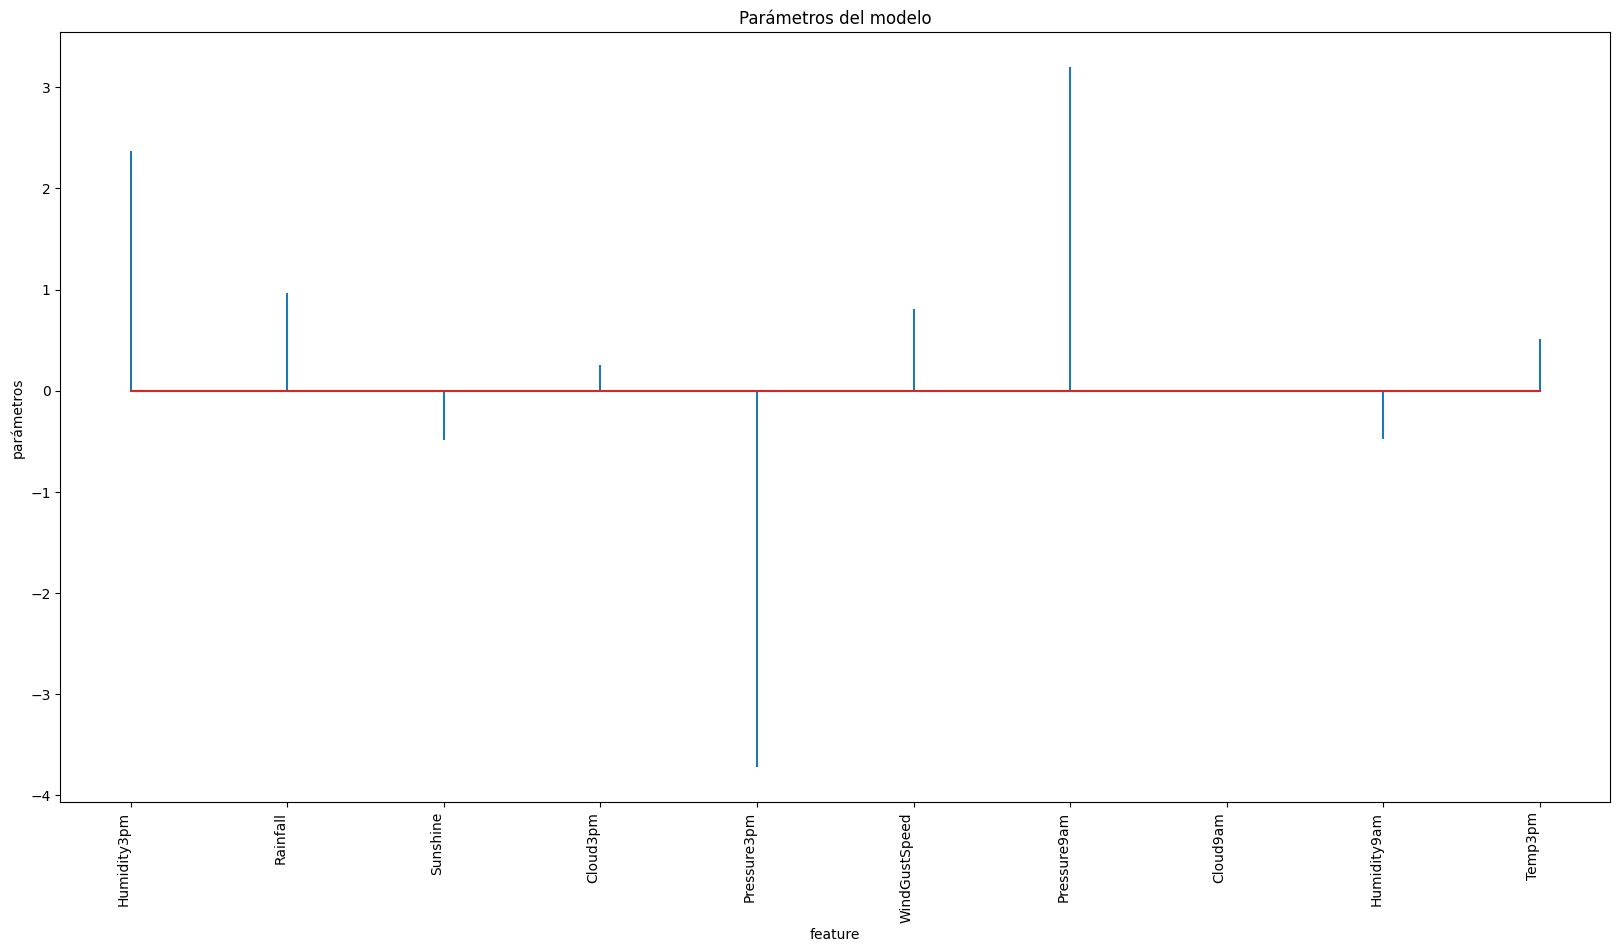

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [85]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [86]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 5.4178337137450185


In [87]:
elasticnet_R2 = metrics.r2_score(y_test, y_pred)
elasticnet_R2.round(4)

0.2199

In [88]:
# new
y_pred_2 = model.predict(X_train)
elasticnet_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_elasticnet_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(elasticnet_R2_train, rmse_elasticnet_train)

Métricas de entrenamiento
0.22340284067385674 5.31539218981632


# Comparación de los distintos modelos

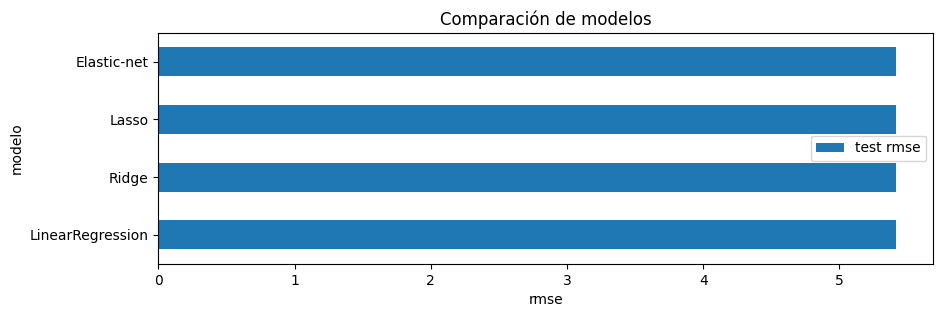

In [89]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [90]:
print([rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic])

[5.41742369040272, 5.417461632424209, 5.417831815859313, 5.4178337137450185]


In [91]:
print([rl_R2, lasso_R2, ridge_R2, elasticnet_R2])

[0.22004364315970215, 0.2199261216022672, 0.22003271795754953, 0.2199255750768775]


No existe demasiada variabilidad entre los modelos, el resultado es similar en todos ellos.

In [92]:
#new 
data = {
    'método': ['Regresion Lineal', 'Ridge', 'Lasso', 'ElasticNet'],
    'r2 test': [rl_R2, ridge_R2, lasso_R2, elasticnet_R2],
    'rmse test': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic],
    'r2 train': [rl_R2_train, ridge_R2_train, lasso_R2_train, elasticnet_R2_train],
    'rmse train': [rmse_ols_train, rmse_ridge_train, rmse_lasso_train, rmse_elasticnet_train]
}

# Crear el DataFrame
metrics = pd.DataFrame(data)

# Mostrar el DataFrame
print(metrics)

             método   r2 test  rmse test  r2 train  rmse train
0  Regresion Lineal  0.220044   5.417424  0.223403    5.315392
1             Ridge  0.220033   5.417462  0.223403    5.315392
2             Lasso  0.219926   5.417832  0.223403    5.315392
3        ElasticNet  0.219926   5.417834  0.223403    5.315392


Vemos que para cada caso las métricas calculados con los datos de test y de entramiento son muy similares, esto nos dice que los modelos han logrado un buen ajuste en los datos de entrenamiento como en los de prueba.
Estos podría indicarnos que nuestros modelos son capaces de generalizar bien a nuevos datos.

# Gradiente descendiente


In [93]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [94]:
from sklearn.preprocessing import StandardScaler

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=100, batch_size=32):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    n = X_train_scaled.shape[0]
    m = X_train_scaled.shape[1]

    X_train_scaled = np.hstack((np.ones((n, 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        permutation = np.random.permutation(n)
        X_train_shuffled = X_train_scaled[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, n, batch_size):
            x_batch = X_train_shuffled[j:j+batch_size, :]
            y_batch = y_train_shuffled[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test_scaled, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W


In [95]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [96]:
data_new.head()

Humidity3pm  Rainfall  Sunshine  Cloud3pm  Pressure3pm  WindGustSpeed  \
244         67.0       5.0       2.6  4.740401       1017.7           48.0   
246         52.0       0.8       7.8  4.740401       1022.6           35.0   
248         56.0       0.0       2.1  4.740401       1026.5           20.0   
250         46.0       0.0       8.0  4.740401       1025.6           30.0   
251         67.0       0.0       0.9  4.740401       1020.2           30.0   

     Pressure9am  Cloud9am  Humidity9am  Temp3pm  
244       1017.4  4.749017         92.0     14.9  
246       1022.4  4.749017         75.0     15.5  
248       1027.8  4.749017         81.0     13.9  
250       1028.7  4.749017         71.0     15.3  
251       1023.6  4.749017         56.0     13.8

Para este modelo decidimos comparar con la primera columna

In [97]:
print(df_regresion.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22217 entries, 244 to 19024
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                22217 non-null  float64
 1   MaxTemp                22217 non-null  float64
 2   Rainfall               22217 non-null  float64
 3   Evaporation            22217 non-null  float64
 4   Sunshine               22217 non-null  float64
 5   WindGustDir            22217 non-null  float64
 6   WindGustSpeed          22217 non-null  float64
 7   WindDir9am             22217 non-null  float64
 8   WindDir3pm             22217 non-null  float64
 9   WindSpeed9am           22217 non-null  float64
 10  WindSpeed3pm           22217 non-null  float64
 11  Humidity9am            22217 non-null  float64
 12  Humidity3pm            22217 non-null  float64
 13  Pressure9am            22217 non-null  float64
 14  Pressure3pm            22217 non-null  float64
 15  Cloud

In [98]:
X,y = df['RainTomorrow_Yes'].values.reshape(-1,1),df['RainfallTomorrow'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

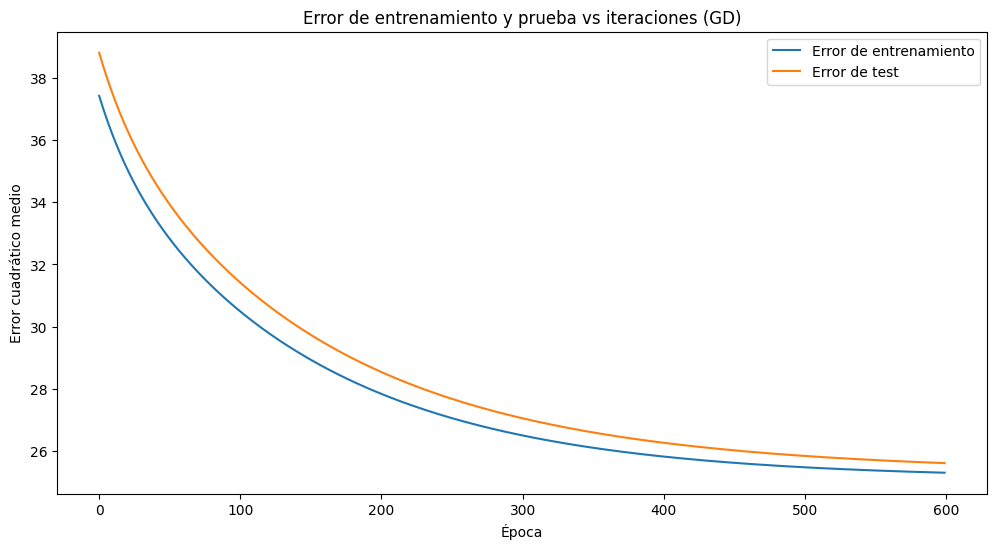

array([[0.38538249],
       [6.90978755]])

In [99]:
gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=600)

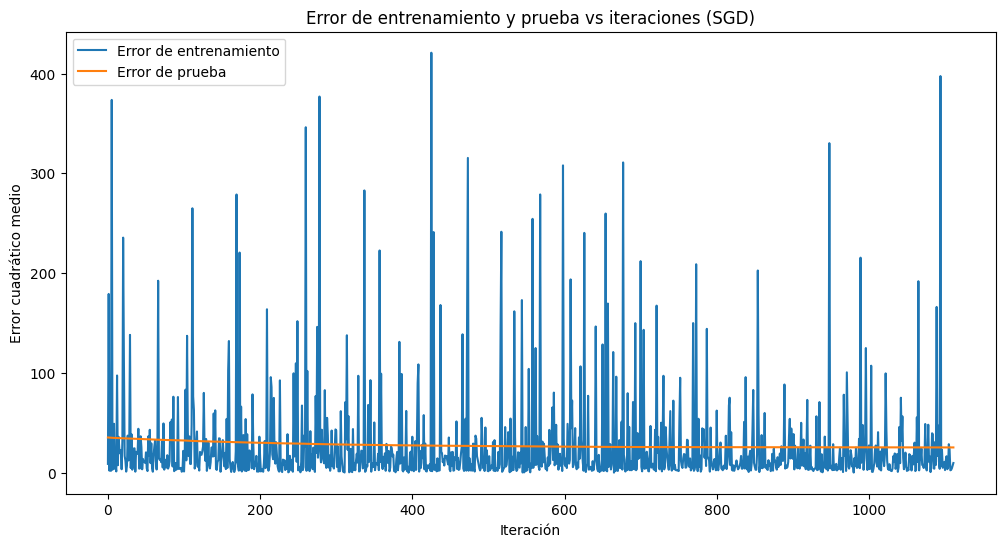

array([[1.7019511 ],
       [3.11697666]])

In [100]:
stochastic_gradient_descent(X_train, y_train, X_test, y_test, epochs=2)

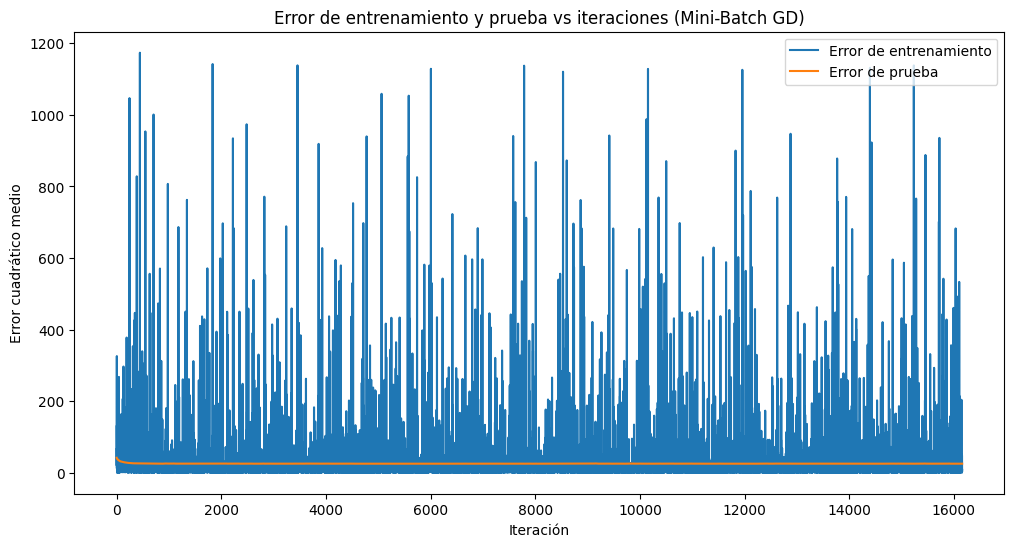

array([[0.13688248],
       [8.21893408]])

In [101]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, epochs=10)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                             df['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17773, 30), (4444, 30), (17773, 1), (4444, 1))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\602047562.py:31: RuntimeWarning: overflow encountered in square
  train_mse = np.mean(error_train ** 2)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\602047562.py:37: RuntimeWarning: overflow encountered in square
  test_mse = np.mean(error_test ** 2)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\602047562.py:28: RuntimeWarning: invalid value encountered in matmul
  prediction_train = np.matmul(X_train, W)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\602047562.py:35: RuntimeWarning: invalid value encountered in matmul
  prediction_test = np.matmul(X_test, W)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21788\602047562.py:41: RuntimeWarning: in

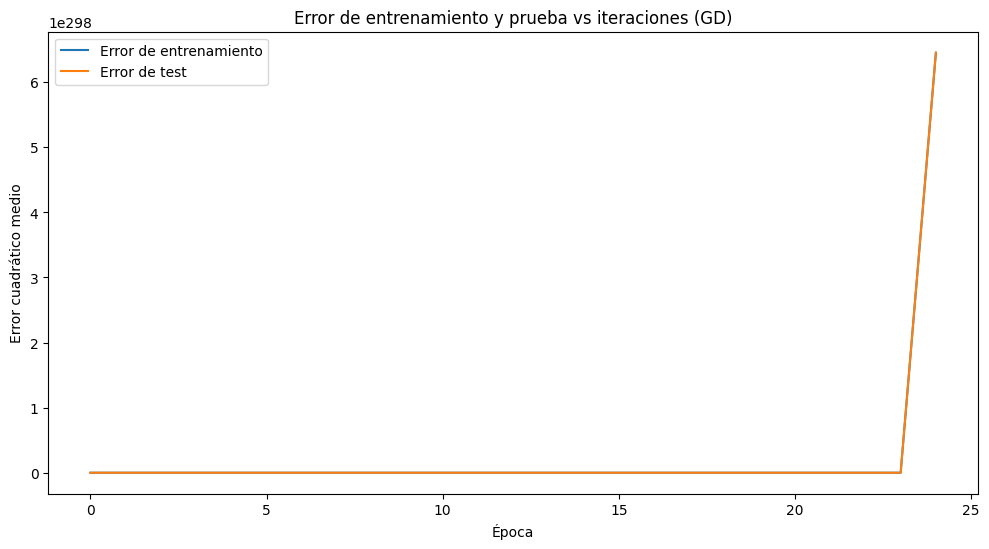

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [104]:
gradient_descent(X_train, y_train, X_test, y_test, epochs=200, lr=0.1)

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

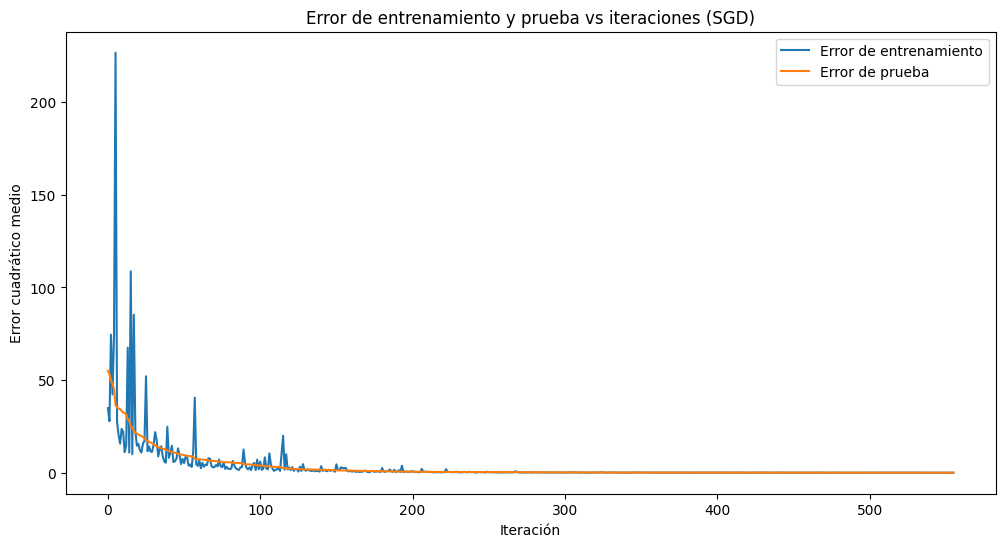

array([[ 1.96646781e+00],
       [ 1.07371058e-01],
       [ 4.40622851e-01],
       [ 4.61519494e-03],
       [-4.16327343e-02],
       [-1.29825938e-02],
       [-3.19791508e-02],
       [ 2.41500310e-02],
       [-4.62309126e-02],
       [-1.21519542e-02],
       [-2.57013161e-02],
       [-2.84744084e-02],
       [ 3.91506544e-02],
       [-9.10945319e-02],
       [-8.12381880e-01],
       [ 8.03908710e-01],
       [-9.40968788e-03],
       [-9.68133346e-03],
       [-2.55991263e-01],
       [-2.64086253e-01],
       [ 6.06939587e+00],
       [ 2.00252356e-02],
       [ 8.38945165e-03],
       [-3.14518322e-02],
       [-1.29008582e-02],
       [ 3.10912390e-04],
       [ 3.04291375e-02],
       [-5.55335189e-02],
       [ 6.30770905e-02],
       [-3.27580780e-02],
       [ 7.06374419e-03]])

In [106]:
# lr = 0.001 es muy chico, 0.1 muy grande
stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

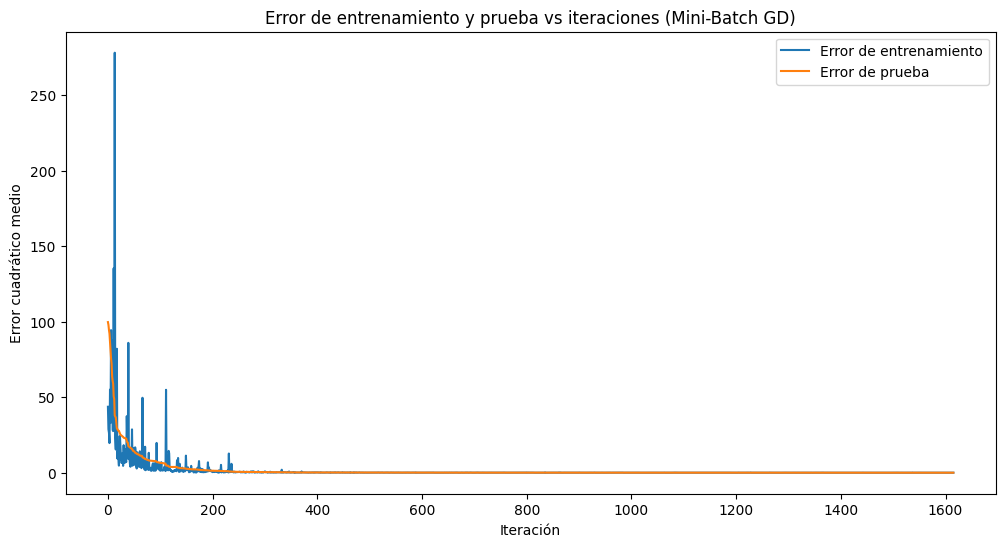

array([[ 1.96755567e+00],
       [ 8.85354509e-02],
       [ 2.51206506e-03],
       [-1.45345042e-02],
       [-2.38361272e-03],
       [-1.06229721e-02],
       [-8.10156641e-03],
       [-4.94668333e-03],
       [-3.12412620e-02],
       [-2.06366820e-02],
       [-2.43122063e-02],
       [ 1.66246082e-02],
       [-8.96670173e-02],
       [ 6.90438715e-02],
       [-5.48444353e-01],
       [ 5.24314587e-01],
       [-7.38285775e-03],
       [ 5.41151597e-03],
       [-3.26024253e-01],
       [ 2.73600703e-01],
       [ 6.09237278e+00],
       [ 2.01962658e-02],
       [ 2.03529981e-02],
       [-1.11088772e-02],
       [-5.86304877e-03],
       [ 8.69890957e-03],
       [ 2.07183460e-02],
       [-2.45391980e-02],
       [ 1.08947656e-02],
       [-2.39056506e-02],
       [ 1.23093692e-02]])

In [107]:
mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

- Comportamiento de los errores de entrenamiento y prueba a lo largo de las épocas/iteraciones:

Para Gradiente Descendiente, vemos que el error de entrenamiento y test baja significativamente hasta las 300 epochs, estabilizándose alrededor de las 600 en un valor de 25.
Para Gradiente Descendiente Estocástico, vemos un comportamiento errático en los errores de entrenamiento, propios del método, pero vemos al error de prueba rápidamente estabilizado también alrededor de 25.
Para Mini-Batch, sucede algo similar que para gradiente descendiente estocástico: observamos una mayour volatilidad en los errores de prueba, y la misma estabilidad del error de test a través de las iteraciones.

No hay indicios de overfitting, ya que el error en entrenamiento y test no es muy distante. El problema es que el modelo no es demasiado explicativo del problema.

Experimentamos con las epochs y los lr, encontrando un buen balance en los valores ejecutados en este script.

# Correcciones

Cambios que hicimos de la entrega 1 a la entrega 2:
- Ordenamos los datos a partir de la fecha de forma creciente --> esto lo hacemos para rehacer la division en train y test (ver si es necesario)
- Agregamos las métricas para los datos de train

Todo el codigo que se modifico se encuentra con un comentario #new para poder diferenciarlo más rapidamente.

# Algoritmos de Clasificación 

## Regresión Logística

In [ ]:
#del data set antes habia eliminado la columna rainfallyes, ahora la tendriamos que volver a agregar

In [111]:
# xc yc la c hace referencia a clasificacion
Xc = data_new
yc = df['RainTomorrow_Yes']
print(Xc.columns)

Index(['Humidity3pm', 'Rainfall', 'Sunshine', 'Cloud3pm', 'Pressure3pm',
       'WindGustSpeed', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'Temp3pm'],
      dtype='object')


In [112]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc.values.reshape(-1,1),test_size=0.2,random_state = 42)

In [114]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(Xc_train, yc_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(Xc_test)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
model

LogisticRegression(random_state=42)

In [118]:
yc_train_pred = model.predict(Xc_train)
yc_test_pred = model.predict(Xc_test) # Notar que debemos escalar los datos de testeo antes de realizar predicciones


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\3477162409.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RainTomorrow_Yes", y="Cloud9am",


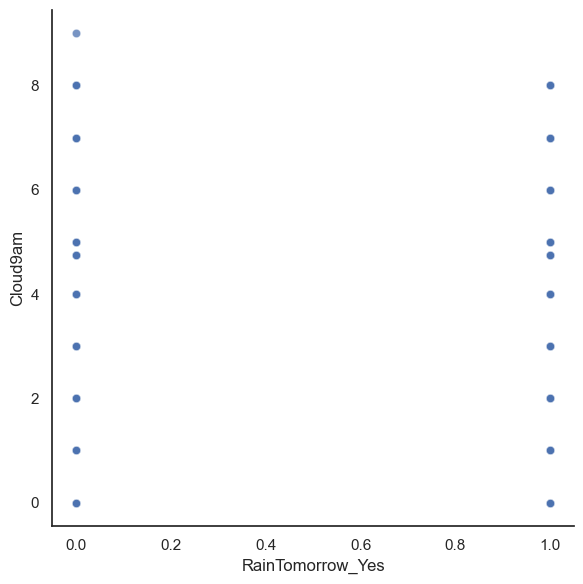

In [125]:
# Ploteos de las clases vs algún feature
sns.set(style="white")

sns.relplot(x="RainTomorrow_Yes", y="Cloud9am",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29312\4291021910.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RainTomorrow_Yes", y="Rainfall",


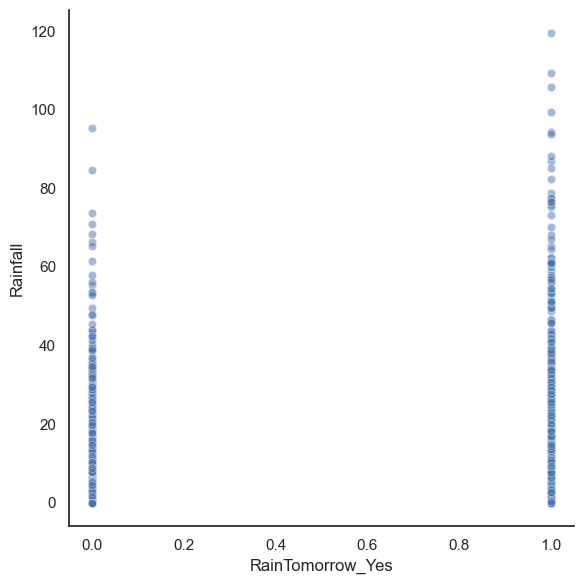

In [127]:
# Ploteos de las clases vs algún feature

sns.relplot(x="RainTomorrow_Yes", y="Rainfall",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df)

Vemos que rainfall asume valores mas altos para la clase 1, que indica que llovio el dia posterior.